# RUDRAPATI ROHITH

# TASK6

# Prediction using decision tree algorithm


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [2]:
dataset=pd.read_csv('iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


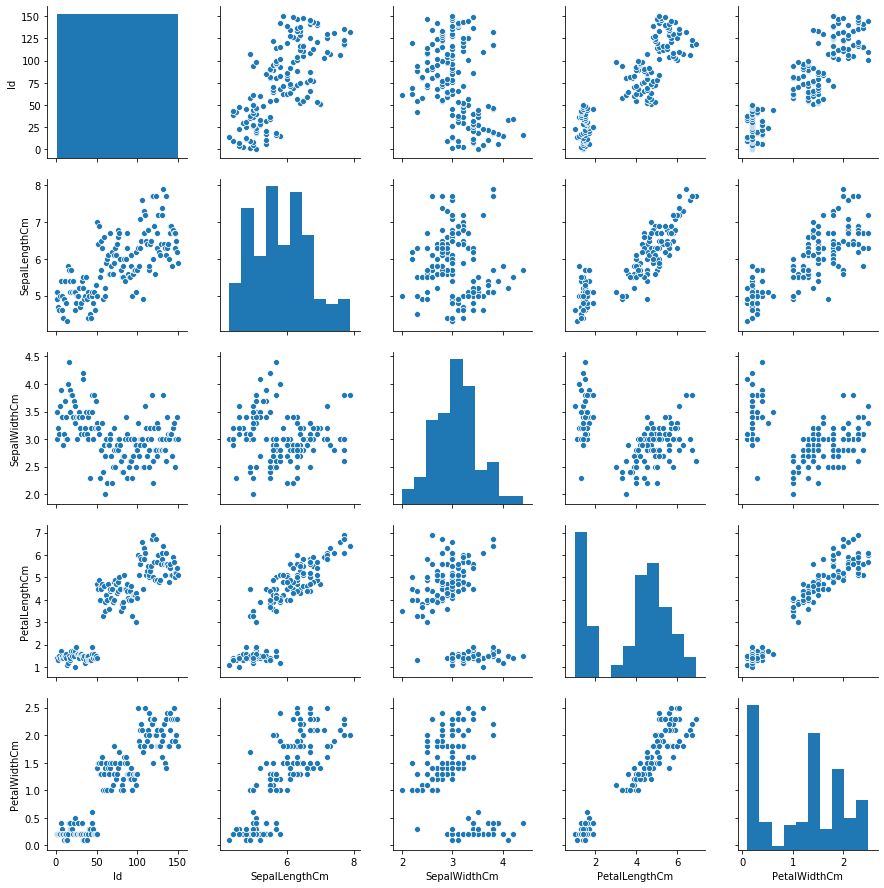

In [3]:
sns.pairplot(dataset)

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

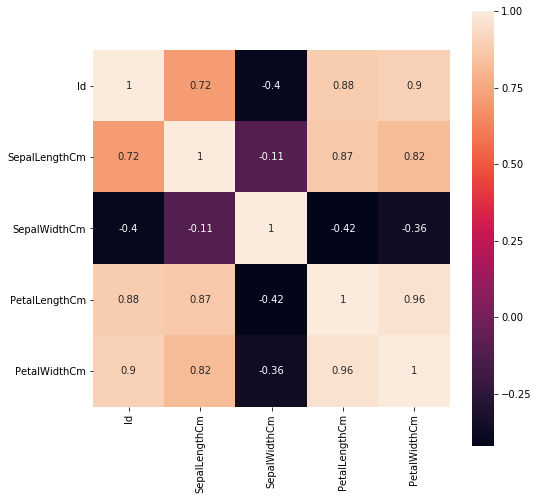

In [4]:
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(),annot=True,square=True)
plt.yticks(rotation=0)

In [5]:
label_encoder=LabelEncoder()
X=dataset.iloc[:,1:5].values
y=label_encoder.fit_transform(dataset['Species'].values)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=13)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)
print("The Model is trained")

The Model is trained


In [8]:
y_pred=dec.predict(x_test)

In [9]:
dec.predict([[ 5.1, 3.5, 1.4, 0.2]])

array([0])

In [10]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Confusion Matrix',confusion_matrix(y_test,y_pred))
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

Confusion Matrix [[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]
Accuracy Score 0.9666666666666667
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



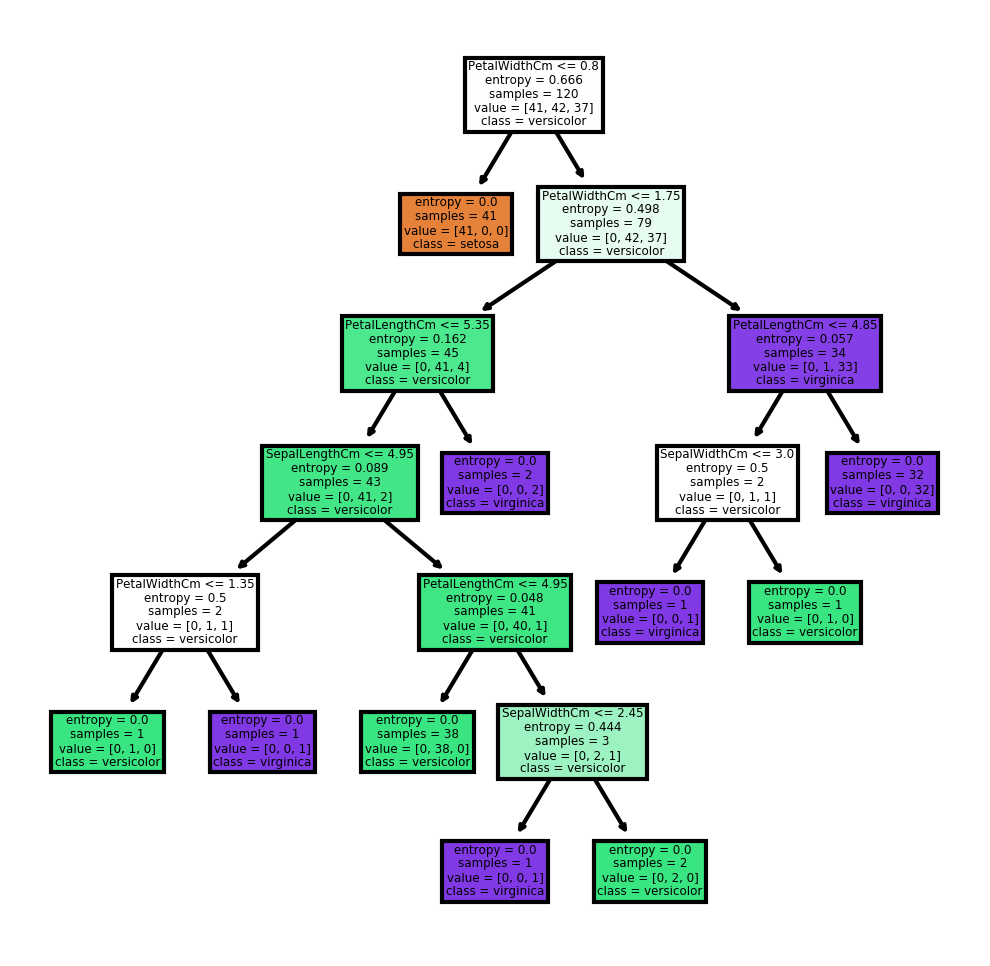

In [11]:
a=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
b=['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(dec,feature_names=a,class_names=b,filled=True)
fig.savefig('imagename.png')